# Fuzzy logic task

Define a fuzzy controller for a distance to stop system for cars.

Also define the functions for each input, e. g. $$f_{light}(x) = min(2x, 1)$$
Write everything with Python code and visualize your results!
You can alternatively visualize it on paper.
Use center of gravity to calculate the final result.

The following information is provided:

## Inputs

### 1. Speed of vehicle
#### Set of terms
- slow
- medium
- fast


The terms are in range [0, 100]

### 2. (Own) Car weight

#### Set of terms
- light
- medium
- heavy

The terms are in range [0, 100]

## Output

## Distance to full stop

#### Set of terms
- very low
- low
- medium
- high
- very high 

The terms are in range [0, 3] ($\times$10meters)

## Inference rules

| Id 	| Speed 	| Car weight 	| Distance 	|  
|:---:	|:--------:	|:------------:	|:--------:	|  
| 1 	| slow 	    | light     	| very low 	|  
| 2 	| slow   	| medium 	    | low    	|  
| 3 	| slow  	| heavy     	| medium  	|  
| 4 	| medium 	| light     	| low   	|  
| 5 	| medium 	| medium    	| medium 	|  
| 6 	| medium 	| heavy     	| high   	|  
| 7 	| fast  	| light 	    | medium 	|  
| 8 	| fast  	| medium    	| high  	|  
| 9 	| fast  	| heavy 	    | very high 	|  

## Question

Calculate the distance for

1) Speed = 30

2) Car weight = 60

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [52]:
# Fuzzificiation

# Create range of variables
speed = np.arange(0, 101, 1)
weight = np.arange(0, 101, 1)
distance = np.arange(0, 3.01, 0.01)

# Membership functions for Speed
speed_interval = 100 / (3-1)
speed_slow = fuzz.trimf(speed, [0, 0, speed_interval])
speed_medium = fuzz.trimf(speed, [0, speed_interval, speed_interval*2])
speed_fast = fuzz.trimf(speed, [speed_interval, speed_interval*2, speed_interval*2])

# Membership functions for Weight
weight_interval = 100 / (3-1)
weight_light = fuzz.trimf(weight, [0, 0, weight_interval])
weight_medium = fuzz.trimf(weight, [0, weight_interval, weight_interval*2])
weight_heavy = fuzz.trimf(weight, [weight_interval, weight_interval*2, weight_interval*2])

# Membership functions for Distance
distance_interval = 3 / (5-1)
distance_vlow = fuzz.trimf(distance, [0, 0, distance_interval])
distance_low = fuzz.trimf(distance, [0, distance_interval, distance_interval*2])
distance_medium = fuzz.trimf(distance, [distance_interval, distance_interval*2, distance_interval*3])
distance_high = fuzz.trimf(distance, [distance_interval*2, distance_interval*3, distance_interval*4])
distance_vhigh = fuzz.trimf(distance, [distance_interval*3, distance_interval*4, distance_interval*4])

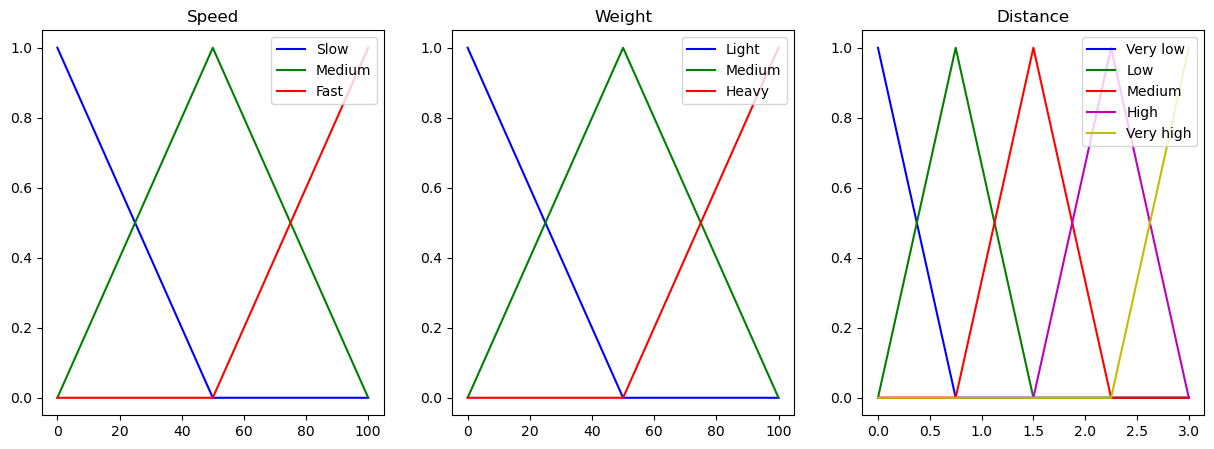

In [53]:
# Visualise the inputs and membership
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))

# Plot Speed
ax0.plot(speed, speed_slow, 'b', label='Slow')
ax0.plot(speed, speed_medium, 'g', label='Medium')
ax0.plot(speed, speed_fast, 'r', label='Fast')
ax0.set_title('Speed')
ax0.legend(loc="upper right")

# Plot Speed
ax1.plot(weight, weight_light, 'b', label='Light')
ax1.plot(weight, weight_medium, 'g', label='Medium')
ax1.plot(weight, weight_heavy, 'r', label='Heavy')
ax1.set_title('Weight')
ax1.legend(loc="upper right")

# Plot Speed
ax2.plot(distance, distance_vlow, 'b', label='Very low')
ax2.plot(distance, distance_low, 'g', label='Low')
ax2.plot(distance, distance_medium, 'r', label='Medium')
ax2.plot(distance, distance_high, 'm', label='High')
ax2.plot(distance, distance_vhigh, 'y', label='Very high')
ax2.set_title('Distance')
ax2.legend(loc="upper right")

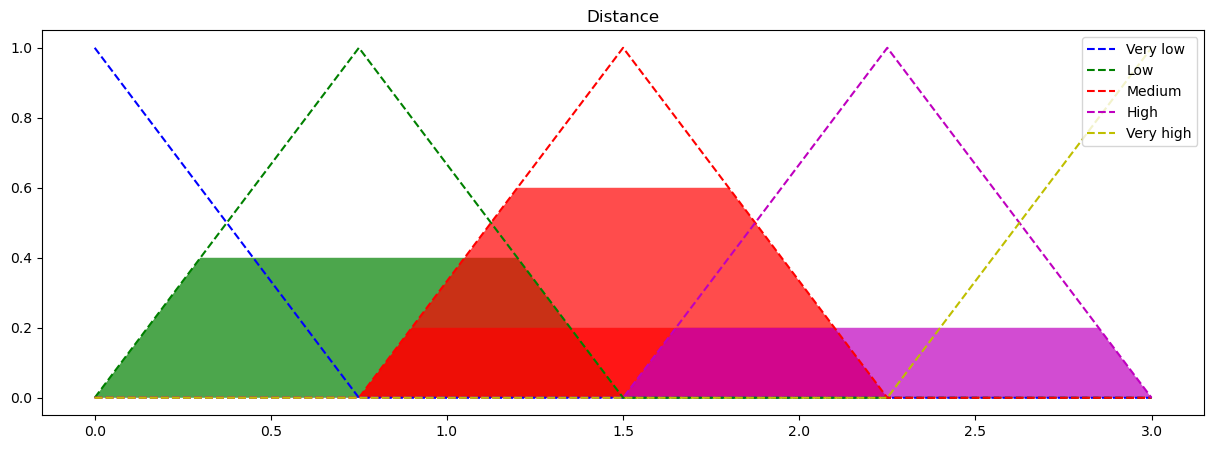

In [54]:
# Find fuzzy membership with two input values of speed and weight
def activate_distance_membership(speed_input, weight_input):
    global speed, speed_slow, speed_medium, speed_fast
    global weight, weight_light, weight_medium, weight_heavy
    global distance

    distance_activation = []

    # To interpret input values into range(0,1)
    speed_level_slow = fuzz.interp_membership(speed, speed_slow, speed_input)
    speed_level_medium = fuzz.interp_membership(speed, speed_medium, speed_input)
    speed_level_fast = fuzz.interp_membership(speed, speed_fast, speed_input)

    weight_level_light = fuzz.interp_membership(weight, weight_light, weight_input)
    weight_level_medium = fuzz.interp_membership(weight, weight_medium, weight_input)
    weight_level_heavy = fuzz.interp_membership(weight, weight_heavy, weight_input)

    # Apply Rules
    # Rule 1: Speed (slow) and Weight (light) = Distance (very low)
    rule1 = np.fmin(speed_level_slow, weight_level_light)
    distance_level1 = np.fmin(rule1, distance_vlow)
    distance_activation.append(distance_level1)
    
    # Rule 2: Speed (slow) and Weight (medium) = Distance (low)
    rule2 = np.fmin(speed_level_slow, weight_level_medium)
    distance_level2 = np.fmin(rule2, distance_low)
    distance_activation.append(distance_level2)
    
    # Rule 3: Speed (slow) and Weight (heavy) = Distance (medium)
    rule3 = np.fmin(speed_level_slow, weight_level_heavy)
    distance_level3 = np.fmin(rule3, distance_medium)
    distance_activation.append(distance_level3)
    
    # Rule 4: Speed (medium) and Weight (light) = Distance (low)
    rule4 = np.fmin(speed_level_medium, weight_level_light)
    distance_level4 = np.fmin(rule4, distance_low)
    distance_activation.append(distance_level4)
    
    # Rule 5: Speed (medium) and Weight (medium) = Distance (medium)
    rule5 = np.fmin(speed_level_medium, weight_level_medium)
    distance_level5 = np.fmin(rule5, distance_medium)
    distance_activation.append(distance_level5)
    
    # Rule 6: Speed (medium) and Weight (heavy) = Distance (high)
    rule6 = np.fmin(speed_level_medium, weight_level_heavy)
    distance_level6 = np.fmin(rule6, distance_high)
    distance_activation.append(distance_level6)
    
    # Rule 7: Speed (fast) and Weight (light) = Distance (medium)
    rule7 = np.fmin(speed_level_fast, weight_level_light)
    distance_level7 = np.fmin(rule7, distance_medium)
    distance_activation.append(distance_level7)

    # Rule 8: Speed (fast) and Weight (medium) = Distance (high)
    rule8 = np.fmin(speed_level_fast, weight_level_medium)
    distance_level8 = np.fmin(rule8, distance_high)
    distance_activation.append(distance_level8)

    # Rule 9: Speed (fast) and Weight (medium) = Distance (high)
    rule9 = np.fmin(speed_level_fast, weight_level_heavy)
    distance_level9 = np.fmin(rule9, distance_vhigh)
    distance_activation.append(distance_level9)

    return distance_activation

# Inputs
speed_input = 30
weight_input = 60

# Output visualisation
distance_null = np.zeros_like(distance) # x-axis
distance_output = activate_distance_membership(speed_input, weight_input)

fig, ax = plt.subplots(figsize=(15, 5))

colours = ['b', 'g', 'r', 'g', 'r', 'm', 'r', 'm', 'y'] # colours corresponding to labels

# Fill the graph with their correspond colours/labels based on the rules
for i in range(9):
    ax.fill_between(distance, distance_null, distance_output[i], facecolor=colours[i], alpha=0.7)


ax.plot(distance, distance_vlow, 'b', linestyle='--', label='Very low')
ax.plot(distance, distance_low, 'g', linestyle='--', label='Low')
ax.plot(distance, distance_medium, 'r', linestyle='--', label='Medium')
ax.plot(distance, distance_high, 'm', linestyle='--', label='High')
ax.plot(distance, distance_vhigh, 'y', linestyle='--', label='Very high')
ax.set_title('Distance')
ax.legend(loc="upper right")

In [55]:
# Aggregrate all outputs into one

from functools import reduce

def max_array(arr1, arr2):
    return np.fmax(arr1, arr2)

aggregated = reduce(max_array, distance_output)


For speed=30 and weight=60, the distance is 1.3749999999999998 x10 meters.


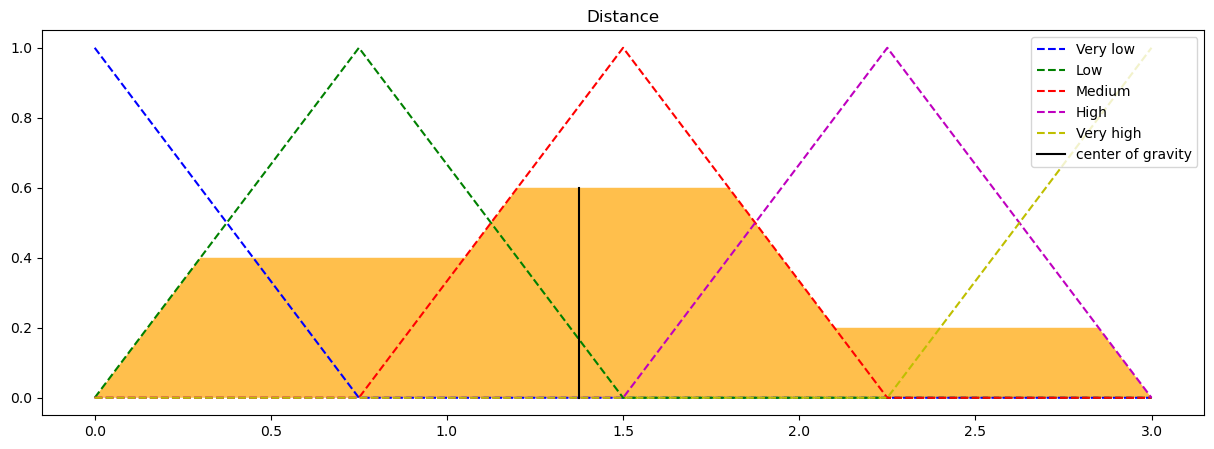

In [57]:
# Calculate defuzzified result
distance_result = fuzz.defuzz(distance, aggregated, 'centroid')

# To visualise result
distance_activation = fuzz.interp_membership(distance, aggregated, distance_result)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(distance, distance_vlow, 'b', linestyle='--', label='Very low')
ax.plot(distance, distance_low, 'g', linestyle='--', label='Low')
ax.plot(distance, distance_medium, 'r', linestyle='--', label='Medium')
ax.plot(distance, distance_high, 'm', linestyle='--', label='High')
ax.plot(distance, distance_vhigh, 'y', linestyle='--', label='Very high')
ax.fill_between(distance, distance_null, aggregated, facecolor='orange', alpha=0.7) # Colour aggregate area
ax.plot([distance_result, distance_result], [0, distance_activation], 'k', label='center of gravity') # Draw line for center of gravity

ax.set_title('Distance')
ax.legend(loc="upper right")

# Print result
print(f"For speed={speed_input} and weight={weight_input}, the distance is {distance_result} x10 meters.")


# Task 2 (Research)

Try out NumPy: [NumPy](https://numpy.org/) [Quickstart](https://numpy.org/devdocs/user/quickstart.html)

Try out Pandas: [Pandas](https://pandas.pydata.org/) [Quickstart](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

Try out SKlearn: [Scikit-learn](https://scikit-learn.org/stable/) [Quickstart](https://scikit-learn.org/stable/getting_started.html)

We will use the packages mentioned above in the next practical sessions. Familiarize yourself with the mentioned packages.